In [1]:
!pip install numpy==1.16.1
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1600, 300)         3000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1600, 64)          57664     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1600, 32)          6176      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1600, 16)          1552      
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               4608180   
__________

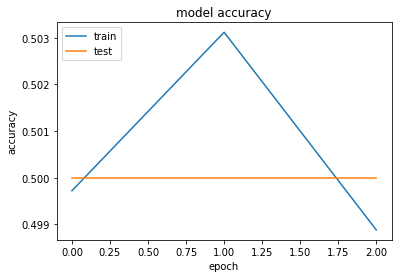

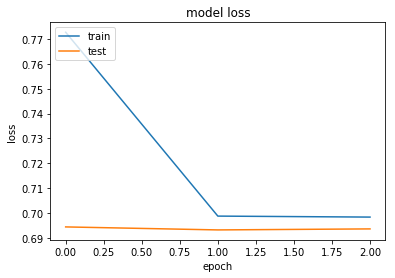

In [3]:
# Pad the sequences to the same length
max_review_length = 1600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

opt = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

# Log to tensorboard
#tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())

#model.fit(X_train, y_train, epochs=3, callbacks=[tensorBoardCallback], batch_size=64)
history = model.fit(X_train, y_train, epochs=3, batch_size=64 , validation_data=(X_test, y_test))

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print('test loss, test acc:', scores)
#print("Accuracy: %.2f%%" % (scores[1]*100))

# plot 
print(history.history.keys())
print(history.history)
print(scores)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
